In [1]:
import os
import sys
import pickle
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression

sys.path.append('../common')
import data_io_utils
import paths
import constants
import utils
import plot_style_utils

%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('study_generalization.txt', delimiter='\t')

print(df.shape)
df.head()

(13, 9)


,study,title,link,phenotype,labeled data points used for training,hit rate (frac improved),log10(search space),interpolative_extrapolative,ML_requires_structure
0,This work (GFP),This work,NaN,fluorescence,24,0.10,35,extrapolative,no
1,This work (beta-lactamase),This work,NaN,fitness (log10 selection ratio),96,0.25,18,extrapolative,no
2,Ogden (2019),Comprehensive AAV capsid fitness landscape rev...,https://science.sciencemag.org/content/366/646...,biodistribution (log2 selection ratio),540,0.25,7,extrapolative,no
3,Bedbrook (2019),Machine learning-guided channelrhodopsin engin...,https://www.nature.com/articles/s41592-019-058...,"photocurrent, wavelength sensitivity, off-kine...",163,0.27,5,interpolative,yes
4,Wu (2019),Machine learning-assisted directed protein evo...,https://www.pnas.org/content/116/18/8852,enantioselectivity,445,NaN,7,interpolative,no


In [3]:
df['log10(labeled data points used for training)'] = np.log10(df['labeled data points used for training']+1)

In [4]:
plot_style_utils.set_pub_plot_context()

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


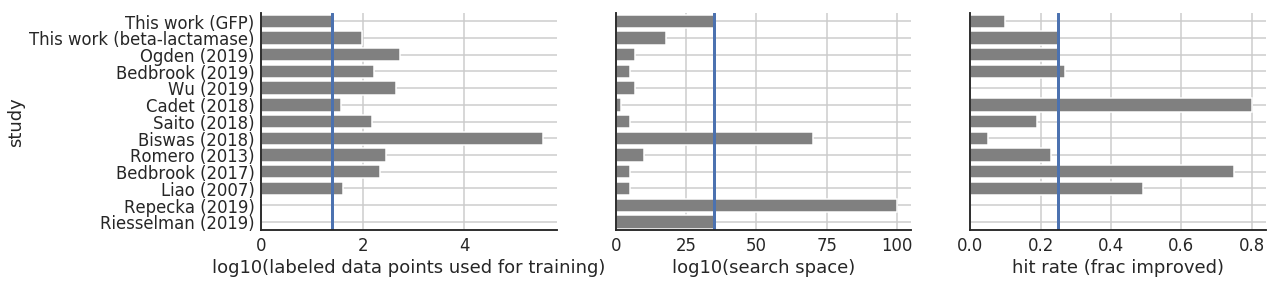

In [5]:
fig = plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
ax = sns.barplot(y='study', x='log10(labeled data points used for training)', data=df, orient='h', 
            color=plot_style_utils.GRAY)
ax.grid('on')
plt.axvline(np.min(df['log10(labeled data points used for training)'].iloc[:2]), color='b', linewidth=3)

plot_style_utils.prettify_ax(ax)

plt.subplot(1,3,2)
ax = sns.barplot(y='study', x='log10(search space)', data=df, orient='h', 
            color=plot_style_utils.GRAY)
ax.set(ylabel='', yticklabels='')
ax.grid('on')
plt.axvline(np.max(df['log10(search space)'].iloc[:2]), color='b', linewidth=3)
plot_style_utils.prettify_ax(ax)

plt.subplot(1,3,3)
ax = sns.barplot(y='study', x='hit rate (frac improved)', data=df, orient='h', 
            color=plot_style_utils.GRAY)
ax.set(ylabel='', yticklabels='')
ax.grid('on')
plt.axvline(np.max(df['hit rate (frac improved)'].iloc[:2]), color='b', linewidth=3)
plot_style_utils.prettify_ax(ax)

plt.show()

plot_style_utils.save_for_pub(path='study_generalization_barplots', fig=fig)

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


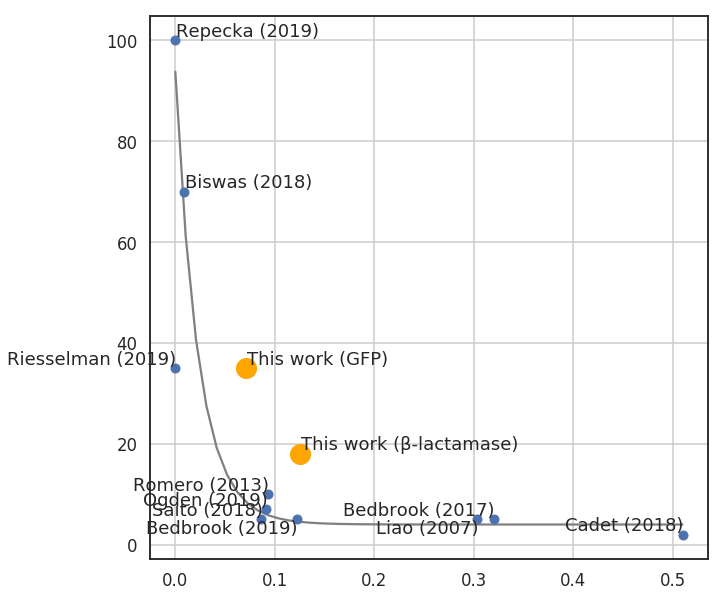

In [6]:
x = df['hit rate (frac improved)']/(df['log10(labeled data points used for training)'])
x[df['log10(labeled data points used for training)'] == 0] = 0
y = df['log10(search space)']
names = list(df['study'])

halns = ['left', 'left', 'right', 'right', 'right', 'right', 'right', 'left', 'right', 'right', 'right', 'left', 'right']
valns = ['bottom']*13
valns[3] = 'top'
valns[10] = 'top'

fig = plt.figure(figsize=(10,10))
plt.plot(x, y,'o')

b = 0.001
xx = np.linspace(0, 0.51)

# Equation obtained from doing linear regression after log log transformation.
yy = np.exp(-43.428*np.log(xx+0.997) + 4.367) + 4
plt.plot(xx, yy, '-', zorder=1, color=plot_style_utils.GRAY)

for i in range(len(x)):
    if not np.isnan(x[i]) and not np.isnan(y[i]):
        if i == 0 or i == 1:
            plt.plot(x[i], y[i], 'o', markersize=20, color='orange')
        plt.text(x[i]+0.001, y[i], names[i].replace('beta-', 'β-') , horizontalalignment=halns[i], verticalalignment=valns[i])
plt.grid('on')
plt.show()

plot_style_utils.save_for_pub(path='study_generalization_2D_plot', fig=fig)